# 05-cell-signaling


_Arvid Lundervold w/Claude 3.5 Sonnet and Grok 3 2025-02-23_


5. **Cell Signaling and Gene Regulatory Networks**

i. Motivation:
- Understanding cellular decision-making
- Studying disease mechanisms
- Drug target identification
- Cellular differentiation

AI support: Generate explanatory content about molecular biology, create interactive tutorials.

ii. Conceptual/Mathematical Description:
- Chemical reaction networks
- Gene expression dynamics
- Feedback loops
- Stochastic effects

AI support: Break down complex biological concepts, generate visual explanations, create simplified examples.

iii. Implementation:
- Ordinary differential equations
- Stochastic simulation algorithm
- Network visualization
- Parameter sensitivity analysis

AI support: Help with numerical methods, suggest optimization strategies, debug complex code.

iv. Simulation/Visualization:
- Concentration time courses
- Network diagrams
- Parameter sensitivity plots
- Interactive pathway exploration

AI support: Generate visualization code, create interactive tools, suggest best practices.

v. Going Deeper:
- Add spatial effects
- Include cell-cell communication
- Model drug interventions
- Study network motifs

AI support: Help with model expansion, suggest parameter optimization, find relevant literature.

----

The project can be implemented with varying levels of complexity, making it suitable for different skill levels. Key Python libraries to use include:

- NumPy/SciPy for numerical computations
- Matplotlib/Plotly for visualization
- NetworkX for network analysis
- Pandas for data management
- SymPy for symbolic mathematics
- scikit-learn for machine learning components

AI can significantly enhance the learning experience by:
1. Generating explanatory content and tutorials
2. Helping with code implementation and debugging
3. Suggesting optimizations and best practices
4. Finding relevant literature and examples
5. Creating interactive visualization tools
6. Assisting with parameter optimization
7. Generating test cases and validation data
8. Helping with model extension and modification



# Notebook Tutorial: Cell Signaling and Gene Regulatory Networks

This tutorial provides a comprehensive introduction to cell signaling and gene regulatory networks using Python. It is designed to cater to beginners and advanced learners, covering motivation, theoretical concepts, implementation, simulations, visualizations, and advanced topics. We'll use key Python libraries like NumPy, SciPy, Matplotlib, Plotly, NetworkX, Pandas, SymPy, and scikit-learn.

---

## **Table of Contents**

1. [Motivation](#motivation)
   - Understanding Cellular Decision-Making
   - Studying Disease Mechanisms
   - Drug Target Identification
   - Cellular Differentiation
2. [Conceptual/Mathematical Description](#conceptual-mathematical-description)
   - Chemical Reaction Networks
   - Gene Expression Dynamics
   - Feedback Loops
   - Stochastic Effects
3. [Implementation](#implementation)
   - Ordinary Differential Equations (ODEs)
   - Stochastic Simulation Algorithm (SSA)
   - Network Visualization
   - Parameter Sensitivity Analysis
4. [Simulation and Visualization](#simulation-visualization)
   - Concentration Time Courses
   - Network Diagrams
   - Parameter Sensitivity Plots
   - Interactive Pathway Exploration
5. [Going Deeper](#going-deeper)
   - Adding Spatial Effects
   - Including Cell-Cell Communication
   - Modeling Drug Interventions
   - Studying Network Motifs
6. [Exercises](#exercises)
7. [Additional Resources](#additional-resources)

---

## **Motivation**

Cell signaling and gene regulatory networks are fundamental to understanding how cells function, communicate, and respond to their environment. Here's why studying them is important:

- **Understanding Cellular Decision-Making**: Cells make decisions based on external signals (e.g., hormones, nutrients) and internal states. This governs processes like growth, division, and programmed cell death (apoptosis). For example, a neuron decides to fire based on neurotransmitter signals.
- **Studying Disease Mechanisms**: Dysregulation of signaling pathways is implicated in diseases like cancer, diabetes, and neurodegenerative disorders. Understanding these networks helps unravel disease mechanisms.
- **Drug Target Identification**: By identifying key molecules or pathways, we can develop drugs to modulate cellular behavior. For example, targeting specific signaling pathways in cancer cells can inhibit tumor growth.
- **Cellular Differentiation**: During development, stem cells differentiate into specialized cells (e.g., neurons, muscle cells). Gene regulatory networks control this process, making it essential for regenerative medicine.

---



## Understanding Cellular Signaling

### Basic Definition
**Signaling in biology** refers to the process by which cells communicate and respond to their environment through molecular mechanisms. It's like a sophisticated cellular "language" that enables:
- Cell-to-cell communication
- Environmental sensing
- Coordinated responses
- Behavior regulation

### Key Components of Signaling

1. **Signal Molecules (Ligands)**:
   - Growth factors
   - Hormones
   - Neurotransmitters
   - Cytokines
   - Small molecules

2. **Signal Reception**:
   - Membrane receptors
   - Nuclear receptors
   - Ion channels
   - Enzyme-linked receptors

3. **Signal Transduction**:
   - Protein phosphorylation
   - Second messengers (e.g., cAMP)
   - Ion fluxes
   - Protein-protein interactions

### Signaling Pathways
The process typically involves:
1. Signal reception (ligand binding)
2. Signal transduction (cascade of events)
3. Cellular response (gene expression changes)

### Mathematical Representation
Basic signaling dynamics:
$$ \frac{d[Response]}{dt} = k_{on}[Signal][Receptor] - k_{off}[Complex] $$

This molecular "conversation" is crucial for:
- Development
- Immune response
- Neural communication
- Tissue homeostasis
- Disease response


---

## **Conceptual/Mathematical Description**

Let's break down the theoretical concepts behind cell signaling and gene regulatory networks.

### Chemical Reaction Networks

Chemical reaction networks model biochemical reactions inside cells. For example, a reaction might be:

\[
A + B \xrightarrow{k} C
\]

- **Ordinary Differential Equations (ODEs)**: For large molecule counts, we model reaction rates using ODEs. For the above reaction:
  \[
  \frac{d[A]}{dt} = -k[A][B], \quad \frac{d[B]}{dt} = -k[A][B], \quad \frac{d[C]}{dt} = k[A][B]
  \]
- **Stochastic Models**: For small molecule counts, randomness matters. We use stochastic methods like Gillespie's algorithm.

### Gene Expression Dynamics

Gene expression involves transcription (DNA to mRNA) and translation (mRNA to protein). This process is regulated by transcription factors and signaling molecules. For example:

- **Transcription Rate**:
  \[
  \frac{d[mRNA]}{dt} = k_{\text{trans}} - \gamma_{\text{mRNA}}[mRNA]
  \]
- **Translation Rate**:
  \[
  \frac{d[Protein]}{dt} = k_{\text{transl}}[mRNA] - \gamma_{\text{protein}}[Protein]
  \]

### Feedback Loops

Feedback loops regulate system behavior:
- **Negative Feedback**: Stabilizes systems (e.g., protein inhibits its own production).
- **Positive Feedback**: Amplifies responses (e.g., protein enhances its own production).

For example, a simple negative feedback loop:
\[
\frac{d[P]}{dt} = \frac{k}{1 + [P]/K_I} - \gamma[P]
\]

### Stochastic Effects

When molecule counts are low, randomness (noise) affects dynamics. For instance, gene expression can be bursty, modeled using stochastic differential equations or the Gillespie algorithm.

---

## **Implementation**

Let's implement these concepts using Python. We'll use NumPy, SciPy, NetworkX, and other libraries.

### Ordinary Differential Equations (ODEs)

We'll solve a simple gene expression model using SciPy's `odeint`.

```python
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define ODE system
def gene_expression(state, t, k_trans, k_transl, gamma_mRNA, gamma_protein):
    mRNA, protein = state
    d_mRNA = k_trans - gamma_mRNA * mRNA
    d_protein = k_transl * mRNA - gamma_protein * protein
    return [d_mRNA, d_protein]

# Parameters
params = (0.5, 0.3, 0.1, 0.05)  # k_trans, k_transl, gamma_mRNA, gamma_protein
t = np.linspace(0, 100, 1000)
initial_state = [0, 0]  # Initial mRNA and protein concentrations

# Solve ODE
solution = odeint(gene_expression, initial_state, t, args=params)
mRNA, protein = solution.T

# Plot
plt.plot(t, mRNA, label="mRNA")
plt.plot(t, protein, label="Protein")
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend()
plt.title("Gene Expression Dynamics")
plt.show()
```

### Stochastic Simulation Algorithm (SSA)

For stochastic simulations, we'll implement Gillespie's algorithm for a simple reaction network.

```python
import numpy as np
import matplotlib.pyplot as plt

def gillespie_simulation(t_max, rates, stoich_matrix, initial_state):
    t = 0
    state = initial_state.copy()
    times, states = [t], [state.copy()]
    
    while t < t_max:
        # Calculate propensities
        propensities = rates(state)
        prop_sum = np.sum(propensities)
        if prop_sum == 0:
            break
        
        # Time to next reaction
        tau = np.random.exponential(1 / prop_sum)
        t += tau
        
        # Choose reaction
        reaction = np.random.choice(len(propensities), p=propensities/prop_sum)
        
        # Update state
        state += stoich_matrix[reaction]
        times.append(t)
        states.append(state.copy())
    
    return np.array(times), np.array(states)

# Example: A -> B with rate k
def rates(state):
    return [0.5 * state[0]]  # Propensity for A -> B

stoich_matrix = np.array([[-1, 1]])  # A decreases, B increases
initial_state = np.array([100, 0])  # Start with 100 A, 0 B

times, states = gillespie_simulation(10, rates, stoich_matrix, initial_state)

plt.plot(times, states[:, 0], label="A")
plt.plot(times, states[:, 1], label="B")
plt.xlabel("Time")
plt.ylabel("Molecule Count")
plt.legend()
plt.title("Stochastic Simulation (Gillespie's Algorithm)")
plt.show()
```

### Network Visualization

We'll use NetworkX to visualize a gene regulatory network.

```python
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_nodes_from(["Gene A", "Gene B", "Protein A", "Protein B"])
G.add_edges_from([("Gene A", "Protein A"), ("Gene B", "Protein B"),
                  ("Protein A", "Gene B"), ("Protein B", "Gene A")])

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=1500, font_size=10)
plt.title("Gene Regulatory Network")
plt.show()
```

### Parameter Sensitivity Analysis

We'll vary parameters and observe their impact on protein concentration.

```python
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def sensitivity_analysis():
    k_trans_vals = np.linspace(0.3, 0.7, 5)
    t = np.linspace(0, 100, 1000)
    protein_end = []
    
    for k_trans in k_trans_vals:
        solution = odeint(gene_expression, [0, 0], t, args=(k_trans, 0.3, 0.1, 0.05))
        protein_end.append(solution[-1, 1])
    
    plt.plot(k_trans_vals, protein_end, "o-")
    plt.xlabel("Transcription Rate (k_trans)")
    plt.ylabel("Steady-State Protein Concentration")
    plt.title("Parameter Sensitivity Analysis")
    plt.show()

sensitivity_analysis()
```

---

## **Simulation and Visualization**

### Concentration Time Courses

We've already plotted time courses in the ODE implementation. For interactivity, we'll use Plotly.

```python
import plotly.graph_objs as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=t, y=mRNA, mode="lines", name="mRNA"))
fig.add_trace(go.Scatter(x=t, y=protein, mode="lines", name="Protein"))
fig.update_layout(title="Interactive Gene Expression Dynamics",
                  xaxis_title="Time", yaxis_title="Concentration")
fig.show()
```

### Network Diagrams

We've visualized networks using NetworkX. For larger networks, consider using Plotly for interactive diagrams.

### Parameter Sensitivity Plots

We've created a basic sensitivity plot. For more advanced analysis, use heatmaps or tornado plots.

### Interactive Pathway Exploration

Let's create a simple Dash app for interactive exploration.

```python
from dash import Dash, dcc, html, Input, Output
import plotly.graph_objs as go
from scipy.integrate import odeint

app = Dash(__name__)

app.layout = html.Div([
    html.H1("Gene Expression Simulator"),
    dcc.Slider(id="k-trans-slider", min=0.1, max=1.0, step=0.1, value=0.5,
               marks={i/10: str(i/10) for i in range(1, 11)}),
    dcc.Graph(id="gene-expression-plot")
])

@app.callback(Output("gene-expression-plot", "figure"),
              [Input("k-trans-slider", "value")])
def update_plot(k_trans):
    t = np.linspace(0, 100, 1000)
    solution = odeint(gene_expression, [0, 0], t, args=(k_trans, 0.3, 0.1, 0.05))
    mRNA, protein = solution.T
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=t, y=mRNA, mode="lines", name="mRNA"))
    fig.add_trace(go.Scatter(x=t, y=protein, mode="lines", name="Protein"))
    fig.update_layout(title=f"Gene Expression (k_trans = {k_trans})",
                      xaxis_title="Time", yaxis_title="Concentration")
    return fig

if __name__ == "__main__":
    app.run_server(debug=True)
```

---

## **Going Deeper**

### Adding Spatial Effects

To model spatial effects, we'll use partial differential equations (PDEs). Here's an example using finite differences (requires `scipy.sparse` for efficiency in larger systems).

```python
import numpy as np
from scipy.sparse import diags
import matplotlib.pyplot as plt

def spatial_gene_expression():
    L = 10  # Length of domain
    N = 100  # Number of spatial points
    dx = L / (N - 1)
    x = np.linspace(0, L, N)
    t = np.linspace(0, 10, 100)
    
    # Diffusion coefficient
    D = 0.1
    
    # Laplacian operator (finite difference)
    diagonals = [1, -2, 1]
    offsets = [-1, 0, 1]
    laplacian = diags(diagonals, offsets, shape=(N, N)).toarray() / dx**2
    
    # Initial condition
    protein = np.exp(-(x - L/2)**2)
    protein_history = [protein.copy()]
    
    # Time-stepping
    dt = 0.01
    for _ in range(len(t) - 1):
        protein += dt * (D * laplacian @ protein + 0.5 - 0.1 * protein)
        protein_history.append(protein.copy())
    
    # Plot
    plt.imshow(protein_history, aspect="auto", extent=[0, L, 0, 10])
    plt.colorbar(label="Protein Concentration")
    plt.xlabel("Position")
    plt.ylabel("Time")
    plt.title("Spatial Diffusion of Protein")
    plt.show()

spatial_gene_expression()
```

### Including Cell-Cell Communication

We'll model two cells interacting via a signaling molecule.

```python
def cell_cell_communication(state, t, k_trans, k_signal, gamma_signal):
    mRNA1, protein1, mRNA2, protein2, signal = state
    d_mRNA1 = k_trans - 0.1 * mRNA1
    d_protein1 = 0.3 * mRNA1 - 0.05 * protein1 + k_signal * signal
    d_mRNA2 = k_trans - 0.1 * mRNA2
    d_protein2 = 0.3 * mRNA2 - 0.05 * protein2 + k_signal * signal
    d_signal = k_signal * (protein1 + protein2) - gamma_signal * signal
    return [d_mRNA1, d_protein1, d_mRNA2, d_protein2, d_signal]

t = np.linspace(0, 100, 1000)
solution = odeint(cell_cell_communication, [0, 0, 0, 0, 0], t, args=(0.5, 0.1, 0.2))
plt.plot(t, solution[:, 1], label="Protein 1")
plt.plot(t, solution[:, 3], label="Protein 2")
plt.plot(t, solution[:, 4], label="Signal")
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend()
plt.title("Cell-Cell Communication")
plt.show()
```

### Modeling Drug Interventions

Let's model a drug that inhibits protein production.

```python
def drug_intervention(state, t, k_trans, drug_effect):
    mRNA, protein = state
    d_mRNA = k_trans - 0.1 * mRNA
    d_protein = 0.3 * mRNA * (1 - drug_effect) - 0.05 * protein
    return [d_mRNA, d_protein]

t = np.linspace(0, 100, 1000)
solution = odeint(drug_intervention, [0, 0], t, args=(0.5, 0.5))
plt.plot(t, solution[:, 1], label="Protein (with drug)")
solution_no_drug = odeint(gene_expression, [0, 0], t, args=(0.5, 0.3, 0.1, 0.05))
plt.plot(t, solution_no_drug[:, 1], label="Protein (no drug)")
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend()
plt.title("Drug Intervention")
plt.show()
```

### Studying Network Motifs

We'll identify common patterns (e.g., feedforward loops) in a larger network.

```python
G = nx.DiGraph()
G.add_edges_from([(1, 2), (1, 3), (2, 3)])  # Feedforward loop
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=1500, font_size=10)
plt.title("Feedforward Loop Motif")
plt.show()
```

---

## **Exercises**

1. **Basic**: Modify the ODE model to include a negative feedback loop. Plot the results and describe the behavior.
2. **Intermediate**: Implement a stochastic simulation for a feedback loop. Compare deterministic and stochastic results.
3. **Advanced**: Extend the spatial model to include multiple interacting species. Visualize the spatial dynamics.

---

## **Additional Resources**

- **Books**:
  - "Systems Biology" by Edda Klipp et al.
  - "An Introduction to Systems Biology" by Uri Alon
- **Papers**:
  - Milo, R., et al. (2002). "Network Motifs: Simple Building Blocks of Complex Networks." *Science*.
- **Online Tutorials**:
  - SciPy documentation for ODE solvers and optimization.
  - NetworkX tutorials for graph analysis.

---

This tutorial provides a modular approach, allowing beginners to focus on basic concepts and advanced users to explore deeper topics. Interactive visualizations and exercises enhance engagement, while AI support (e.g., code generation, debugging, parameter optimization) can further assist learning.

# Snippets for the tutorial

## 1. Mathematical Introduction to Gene Expression Dynamics

### Ordinary Differential Equation (ODE) Model

The gene expression process is modeled using a system of coupled ODEs that describe the temporal evolution of mRNA and protein concentrations:

$$ \begin{align*}
\frac{d[mRNA]}{dt} &= k_{trans} - \gamma_{mRNA}[mRNA] \\
\frac{d[Protein]}{dt} &= k_{transl}[mRNA] - \gamma_{protein}[Protein]
\end{align*} $$

where:
- $[mRNA]$: concentration of messenger RNA
- $[Protein]$: concentration of protein
- $k_{trans}$: transcription rate constant
- $k_{transl}$: translation rate constant
- $\gamma_{mRNA}$: mRNA degradation rate
- $\gamma_{protein}$: protein degradation rate

### Model Parameters
The system is characterized by four key parameters:
- $k_{trans} = 0.5$ (transcription rate)
- $k_{transl} = 0.3$ (translation rate)
- $\gamma_{mRNA} = 0.1$ (mRNA degradation)
- $\gamma_{protein} = 0.05$ (protein degradation)

### Initial Conditions
The system starts from zero concentrations:
$$ [mRNA](0) = 0, \quad [Protein](0) = 0 $$

### Steady State Solution
At steady state ($\frac{d}{dt} = 0$), the concentrations are:
$$ [mRNA]_{ss} = \frac{k_{trans}}{\gamma_{mRNA}} $$
$$ [Protein]_{ss} = \frac{k_{transl}}{\gamma_{protein}} \cdot \frac{k_{trans}}{\gamma_{mRNA}} $$

This model captures the basic dynamics of gene expression, including:
1. mRNA production and degradation
2. Protein synthesis from mRNA
3. Protein degradation
4. Approach to steady state concentrations

The numerical solution is obtained using the `odeint` solver from SciPy, which implements an adaptive step-size method for solving initial value problems.


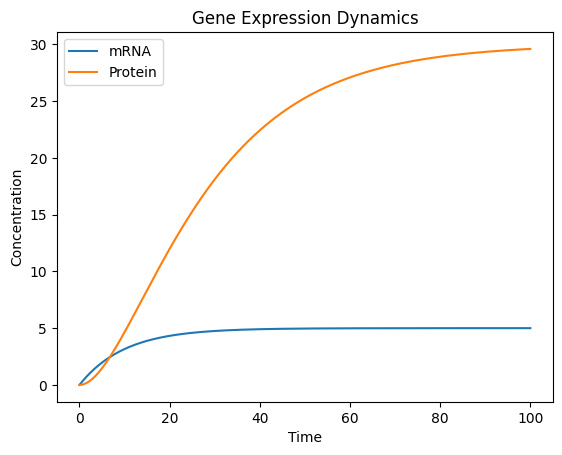

In [12]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define ODE system
def gene_expression(state, t, k_trans, k_transl, gamma_mRNA, gamma_protein):
    mRNA, protein = state
    d_mRNA = k_trans - gamma_mRNA * mRNA
    d_protein = k_transl * mRNA - gamma_protein * protein
    return [d_mRNA, d_protein]

# Parameters
params = (0.5, 0.3, 0.1, 0.05)  # k_trans, k_transl, gamma_mRNA, gamma_protein
t = np.linspace(0, 100, 1000)
initial_state = [0, 0]  # Initial mRNA and protein concentrations

# Solve ODE
solution = odeint(gene_expression, initial_state, t, args=params)
mRNA, protein = solution.T

# Plot
plt.plot(t, mRNA, label="mRNA")
plt.plot(t, protein, label="Protein")
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend()
plt.title("Gene Expression Dynamics")
plt.show()

#### Interpretation of Gene Expression Dynamics

This plot shows the temporal evolution of mRNA and protein concentrations in a simple gene expression system. Let's analyze the key features:

#### mRNA Dynamics (Blue Line)
- **Initial Phase**: Starts at zero and rapidly increases
- **Steady State**: Reaches equilibrium at ~5 concentration units
- **Time Scale**: Achieves steady state relatively quickly (~20 time units)
- **Behavior**: Shows first-order kinetics with balance between production and degradation

#### Protein Dynamics (Orange Line)
- **Initial Phase**: Slight delay compared to mRNA due to sequential nature
- **Growth Phase**: Steeper increase as mRNA levels rise
- **Steady State**: Plateaus at ~30 concentration units
- **Time Scale**: Takes longer to reach steady state (~80 time units)
- **Behavior**: Shows characteristic delayed response and higher steady state level

#### Key Observations
1. **Time Scales**:
   - mRNA reaches steady state faster than protein
   - Reflects biological reality where translation follows transcription

2. **Steady State Levels**:
   - Protein level (~30) is higher than mRNA level (~5)
   - Consistent with biological amplification in gene expression

3. **System Properties**:
   - Demonstrates coupled differential equations
   - Shows stable steady state
   - Exhibits expected biological ordering of events

This behavior aligns with the mathematical model:
$$ \frac{d[mRNA]}{dt} = k_{trans} - \gamma_{mRNA}[mRNA] $$
$$ \frac{d[Protein]}{dt} = k_{transl}[mRNA] - \gamma_{protein}[Protein] $$

The simulation captures the essential features of gene expression: transcription, translation, and the establishment of steady-state concentrations.


## 2. Mathematical Introduction to Gillespie's Stochastic Simulation Algorithm (SSA)

### Stochastic Chemical Kinetics

For a system of chemical reactions with discrete molecule counts, the Gillespie algorithm provides an exact method for simulating the time evolution of the system. Consider a simple reaction:

$$ A \xrightarrow{k} B $$

where $k$ is the reaction rate constant.

### Propensity Function
The propensity function $a(x)$ gives the probability per unit time that a reaction will occur:

$$ a(x) = k \cdot [A] $$

where $[A]$ is the number of A molecules.

### Master Equation
The chemical master equation describes the probability $P(x,t)$ of being in state $x$ at time $t$:

$$ \frac{\partial P(x,t)}{\partial t} = \sum_j [a_j(x-\nu_j)P(x-\nu_j,t) - a_j(x)P(x,t)] $$

where $\nu_j$ is the state change vector for reaction $j$.

### Gillespie Algorithm Steps

1. **Initialize**:
   - Set initial molecule counts: $x = x_0$
   - Set initial time: $t = t_0$

2. **Calculate propensities**:
   $$ a_0 = \sum_j a_j(x) $$

3. **Generate random time step**:
   $$ \tau = -\frac{1}{a_0}\ln(r_1) $$
   where $r_1$ is a uniform random number in $(0,1)$

4. **Choose reaction**:
   Select reaction $j$ with probability:
   $$ P(j) = \frac{a_j(x)}{a_0} $$

5. **Update**:
   - Time: $t \leftarrow t + \tau$
   - State: $x \leftarrow x + \nu_j$

The stoichiometry matrix $\nu$ represents the state changes:
$$ \nu = [-1, 1] $$
indicating that A decreases by 1 and B increases by 1 for each reaction.

This algorithm provides an exact stochastic simulation of the chemical master equation, capturing the discrete and random nature of chemical reactions at low molecule counts.


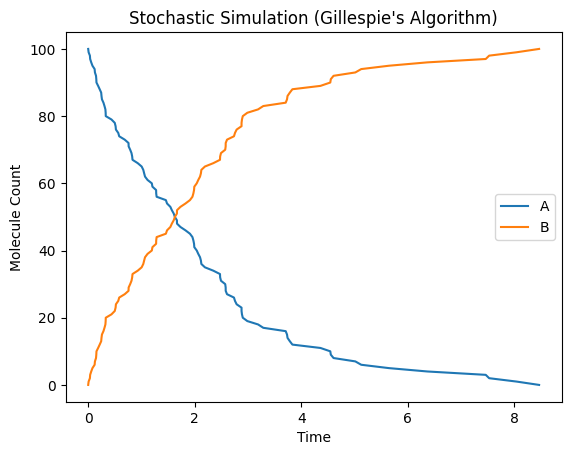

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def gillespie_simulation(t_max, rates, stoich_matrix, initial_state):
    t = 0
    state = initial_state.copy()
    times, states = [t], [state.copy()]
    
    while t < t_max:
        # Calculate propensities
        propensities = rates(state)
        prop_sum = np.sum(propensities)
        if prop_sum == 0:
            break
        
        # Time to next reaction
        tau = np.random.exponential(1 / prop_sum)
        t += tau
        
        # Choose reaction
        reaction = np.random.choice(len(propensities), p=propensities/prop_sum)
        
        # Update state
        state += stoich_matrix[reaction]
        times.append(t)
        states.append(state.copy())
    
    return np.array(times), np.array(states)

# Example: A -> B with rate k
def rates(state):
    return [0.5 * state[0]]  # Propensity for A -> B

stoich_matrix = np.array([[-1, 1]])  # A decreases, B increases
initial_state = np.array([100, 0])  # Start with 100 A, 0 B

times, states = gillespie_simulation(10, rates, stoich_matrix, initial_state)

plt.plot(times, states[:, 0], label="A")
plt.plot(times, states[:, 1], label="B")
plt.xlabel("Time")
plt.ylabel("Molecule Count")
plt.legend()
plt.title("Stochastic Simulation (Gillespie's Algorithm)")
plt.show()

#### Interpretation of Stochastic Simulation (Gillespie's Algorithm)

This plot demonstrates a stochastic simulation of a simple chemical reaction $A \rightarrow B$ using Gillespie's algorithm. Let's analyze the key features:

#### Species A Dynamics (Blue Line)
- **Initial State**: Starts at 100 molecules
- **Decay Pattern**: Shows exponential-like decay
- **Fluctuations**: Exhibits random variations in decay rate
- **End State**: Approaches zero molecules
- **Time Scale**: Most conversion occurs within first 4 time units

#### Species B Dynamics (Orange Line)
- **Initial State**: Starts at 0 molecules
- **Growth Pattern**: Mirror image of A's decay
- **Fluctuations**: Shows complementary stochastic variations
- **End State**: Approaches 100 molecules
- **Conservation**: Total A + B remains constant at 100

#### Key Features of Stochastic Behavior
1. **Discreteness**:
   - Molecule counts change in integer steps
   - Reflects realistic molecular-level events

2. **Randomness**:
   - Non-smooth trajectories
   - Random timing of individual reactions
   - Natural fluctuations in reaction rates

3. **Conservation Law**:
   - Total molecule count preserved
   - Each A molecule converts to one B molecule

4. **System Properties**:
   - Demonstrates stochastic nature of chemical reactions
   - Shows importance of discrete effects at low molecule counts
   - Captures random timing of individual reaction events

This simulation effectively illustrates the stochastic nature of chemical reactions at the molecular level, where randomness and discreteness play important roles in system dynamics.


## 3. Mathematical Introduction to Gene Regulatory Networks

### Network Model Formulation

A gene regulatory network can be represented as a directed graph $G = (V,E)$ where:
- $V$: set of nodes (genes and proteins)
- $E$: set of directed edges (regulatory interactions)

### Mathematical Representation

For a network with $n$ nodes, the dynamics can be described by:

$$ \frac{dx_i}{dt} = \sum_{j=1}^n w_{ij}f(x_j) - \gamma_i x_i $$

where:
- $x_i$: concentration of species $i$
- $w_{ij}$: interaction strength from node $j$ to node $i$
- $f(x)$: activation function (often sigmoidal)
- $\gamma_i$: degradation rate

### Adjacency Matrix
The network structure is captured by the adjacency matrix $W$:

$$ W = \begin{pmatrix} 
0 & w_{12} & 0 & w_{14} \\
w_{21} & 0 & w_{23} & 0 \\
0 & w_{32} & 0 & w_{34} \\
w_{41} & 0 & w_{43} & 0
\end{pmatrix} $$

where:
- $w_{ij} > 0$: activation
- $w_{ij} < 0$: inhibition
- $w_{ij} = 0$: no direct interaction

### Network Motifs
Common regulatory patterns include:
1. **Feed-forward loop**:
   $$ A \rightarrow B \rightarrow C $$
   $$ A \rightarrow C $$

2. **Feedback loop**:
   $$ A \rightarrow B \rightarrow A $$

### Example System
For the shown network:
- Nodes: {Gene A, Gene B, Protein A, Protein B}
- Edges: 
  * Gene A → Protein A (transcription)
  * Gene B → Protein B (transcription)
  * Protein A → Gene B (regulation)
  * Protein B → Gene A (regulation)

This creates a coupled feedback system where proteins regulate the expression of each other's genes, leading to complex dynamic behavior.


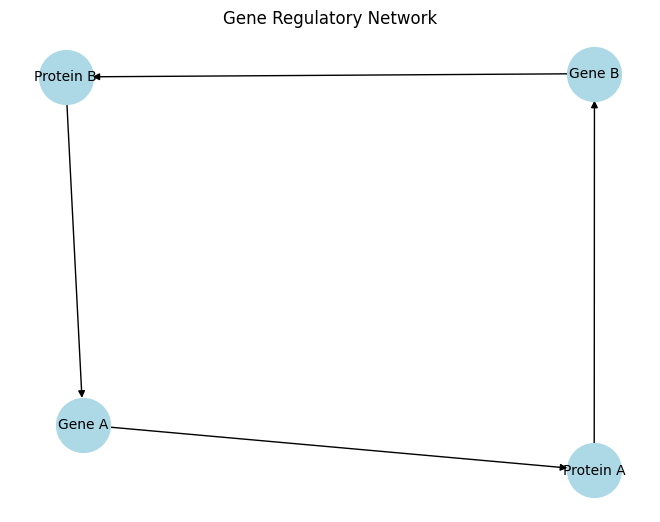

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_nodes_from(["Gene A", "Gene B", "Protein A", "Protein B"])
G.add_edges_from([("Gene A", "Protein A"), ("Gene B", "Protein B"),
                  ("Protein A", "Gene B"), ("Protein B", "Gene A")])

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=1500, font_size=10)
plt.title("Gene Regulatory Network")
plt.show()

#### Interpretation of Gene Regulatory Network

This network diagram represents a simple gene regulatory circuit with four nodes (two genes and their corresponding proteins) showing a coupled feedback system.

### Network Components

1. **Nodes**:
   - Gene A and Gene B (genes)
   - Protein A and Protein B (proteins)

2. **Edges** (Directed interactions):
   - Gene A → Protein A (transcription/translation)
   - Gene B → Protein B (transcription/translation)
   - Protein A → Gene B (regulatory interaction)
   - Protein B → Gene A (regulatory interaction)

#### Network Motifs

1. **Direct Regulation**:
   - Genes produce their respective proteins
   - Classic transcription/translation pathway

2. **Cross-Regulation**:
   - Forms a double negative feedback loop
   - Protein A regulates Gene B
   - Protein B regulates Gene A

#### System Properties

1. **Feedback Structure**:
   - Creates a closed regulatory circuit
   - Can lead to complex dynamic behavior
   - Potential for bistability or oscillations

2. **Biological Significance**:
   - Common motif in gene regulation
   - Important for cellular decision-making
   - Can function as a genetic switch

3. **Dynamic Implications**:
   - System can exhibit multiple steady states
   - Response depends on interaction strengths
   - Important for cellular differentiation

This network represents a fundamental regulatory motif found in many biological systems, capable of generating complex behaviors from simple interactions.


## 4. Mathematical Introduction to Parameter Sensitivity Analysis in Gene Expression

### System Model
The gene expression system is described by coupled ODEs:

$$ \begin{align*}
\frac{d[mRNA]}{dt} &= k_{trans} - \gamma_{mRNA}[mRNA] \\
\frac{d[Protein]}{dt} &= k_{transl}[mRNA] - \gamma_{protein}[Protein]
\end{align*} $$

### Sensitivity Analysis Framework

The sensitivity analysis examines how the steady-state protein concentration $[Protein]_{ss}$ varies with the transcription rate $k_{trans}$:

$$ S_{k_{trans}} = \frac{\partial [Protein]_{ss}}{\partial k_{trans}} $$

## Steady State Solution
At equilibrium:
$$ [mRNA]_{ss} = \frac{k_{trans}}{\gamma_{mRNA}} $$
$$ [Protein]_{ss} = \frac{k_{transl}}{\gamma_{protein}} \cdot \frac{k_{trans}}{\gamma_{mRNA}} $$

### Numerical Implementation
The analysis involves:
1. Varying $k_{trans}$ over a range: $[0.3, 0.7]$
2. Computing steady state for each value
3. Parameters held constant:
   - $k_{transl} = 0.3$
   - $\gamma_{mRNA} = 0.1$
   - $\gamma_{protein} = 0.05$

### Expected Relationship
The steady-state protein concentration should show linear dependence on $k_{trans}$:

$$ [Protein]_{ss} = \left(\frac{k_{transl}}{\gamma_{protein} \gamma_{mRNA}}\right) k_{trans} $$

This analysis helps understand how robust the system is to parameter variations and identifies key control points in the gene expression proces

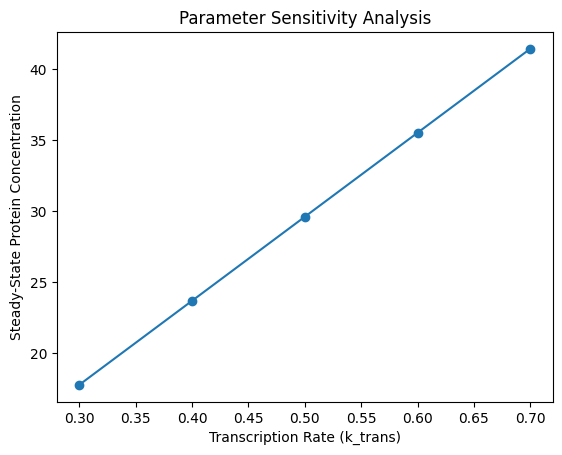

In [17]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def sensitivity_analysis():
    k_trans_vals = np.linspace(0.3, 0.7, 5)
    t = np.linspace(0, 100, 1000)
    protein_end = []
    
    for k_trans in k_trans_vals:
        solution = odeint(gene_expression, [0, 0], t, args=(k_trans, 0.3, 0.1, 0.05))
        protein_end.append(solution[-1, 1])
    
    plt.plot(k_trans_vals, protein_end, "o-")
    plt.xlabel("Transcription Rate (k_trans)")
    plt.ylabel("Steady-State Protein Concentration")
    plt.title("Parameter Sensitivity Analysis")
    plt.show()

sensitivity_analysis()

#### Interpretation of Parameter Sensitivity Analysis

This plot shows the relationship between transcription rate ($k_{trans}$) and steady-state protein concentration in the gene expression system.

### Key Features

1. **Linear Relationship**:
   - Clear linear correlation between $k_{trans}$ and protein level
   - Slope is approximately $\frac{k_{transl}}{\gamma_{protein} \gamma_{mRNA}} \approx 60$
   - No evidence of saturation or threshold effects

2. **Parameter Range**:
   - $k_{trans}$ varies from 0.3 to 0.7
   - Protein concentration ranges from ~18 to ~42 units
   - Five evenly spaced sampling points

3. **System Response**:
   - Proportional change in output vs. input
   - Each 0.1 increase in $k_{trans}$ leads to ~6 unit increase in protein

#### Biological Implications

1. **System Sensitivity**:
   - System shows high sensitivity to transcription rate
   - No buffering or homeostatic mechanisms evident
   - Direct control of protein levels through transcription

2. **Predictability**:
   - Linear response enables accurate prediction
   - Simple relationship between input and output
   - Reliable control through transcription rate

3. **Biological Control**:
   - Transcription rate is an effective control point
   - System responds predictably to parameter changes
   - Suggests straightforward regulation mechanism

This analysis demonstrates that the system exhibits a robust and predictable response to changes in transcription rate, making it a reliable control point for protein expression levels.


## 5. Mathematical Introduction to Spatial Gene Expression Modeling

### Gene Expression Modeling: A Brief Overview

Gene expression modeling is a mathematical framework that describes how genetic information flows from DNA to functional proteins. The core process involves:

### Key Components
1. **Transcription**: DNA → mRNA
   - Rate controlled by $k_{trans}$
   - Regulated by transcription factors
   - Subject to degradation ($\gamma_{mRNA}$)

2. **Translation**: mRNA → Protein
   - Rate controlled by $k_{transl}$
   - Dependent on mRNA concentration
   - Protein degradation ($\gamma_{protein}$)

#### Mathematical Description
The basic model uses coupled differential equations:
$$ \begin{align*}
\frac{d[mRNA]}{dt} &= k_{trans} - \gamma_{mRNA}[mRNA] \\
\frac{d[Protein]}{dt} &= k_{transl}[mRNA] - \gamma_{protein}[Protein]
\end{align*} $$

#### Applications
- Understanding cellular regulation
- Predicting protein levels
- Designing synthetic gene circuits
- Drug development and targeting
- Disease mechanism studies

This modeling approach helps understand how cells control their protein levels and respond to environmental changes through gene regulation.


### Partial Differential Equation (PDE) Model

The spatial distribution of protein concentration $P(x,t)$ is modeled using a reaction-diffusion equation:

$$ \frac{\partial P}{\partial t} = D\frac{\partial^2 P}{\partial x^2} + k_{prod} - \gamma P $$

where:
- $D$: diffusion coefficient
- $k_{prod}$: production rate
- $\gamma$: degradation rate
- $x$: spatial coordinate
- $t$: time

### Finite Difference Discretization

The spatial domain $[0,L]$ is discretized into $N$ points with spacing $\Delta x$:

$$ \frac{\partial^2 P}{\partial x^2} \approx \frac{P_{i+1} - 2P_i + P_{i-1}}{(\Delta x)^2} $$

### Laplacian Operator
The discretized Laplacian is represented by a tridiagonal matrix:

$$ L = \frac{1}{(\Delta x)^2}\begin{pmatrix} 
-2 & 1 & 0 & \cdots \\
1 & -2 & 1 & \cdots \\
0 & 1 & -2 & \cdots \\
\vdots & \vdots & \vdots & \ddots
\end{pmatrix} $$

### Initial and Boundary Conditions
- Initial condition: $P(x,0) = e^{-(x-L/2)^2}$ (Gaussian distribution)
- Boundary conditions: Zero-flux at boundaries
  $$ \left.\frac{\partial P}{\partial x}\right|_{x=0} = \left.\frac{\partial P}{\partial x}\right|_{x=L} = 0 $$

### Numerical Solution
Time evolution using forward Euler method:

$$ P(t+\Delta t) = P(t) + \Delta t(DLP + k_{prod} - \gamma P) $$

Parameters:
- $L = 10$ (domain length)
- $N = 100$ (spatial points)
- $D = 0.1$ (diffusion coefficient)
- $\Delta t = 0.01$ (time step)

This model captures the spatial dynamics of protein distribution, including diffusion, production, and degradation effects.


In [18]:
import plotly.graph_objs as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=t, y=mRNA, mode="lines", name="mRNA"))
fig.add_trace(go.Scatter(x=t, y=protein, mode="lines", name="Protein"))
fig.update_layout(title="Interactive Gene Expression Dynamics",
                  xaxis_title="Time", yaxis_title="Concentration")
fig.show()

#### Interpretation of Interactive Gene Expression Dynamics

This plot demonstrates the temporal evolution of mRNA and protein concentrations in a gene expression system, showing their coupled dynamics over time.

#### mRNA Dynamics (Blue Line)

1. **Initial Phase** (0-10 time units):
   - Starts from zero concentration
   - Shows rapid initial increase
   - Nearly linear growth phase

2. **Steady State** (>20 time units):
   - Plateaus at approximately 5 concentration units
   - Reaches equilibrium quickly
   - Balance between production and degradation

#### Protein Dynamics (Red Line)

1. **Lag Phase** (0-5 time units):
   - Initial delay due to dependence on mRNA
   - Slower initial increase compared to mRNA

2. **Growth Phase** (5-60 time units):
   - Exponential-like increase
   - Steeper rise as mRNA levels stabilize
   - Shows characteristic sigmoidal shape

3. **Steady State** (>60 time units):
   - Gradually approaches ~30 concentration units
   - Takes longer to reach equilibrium than mRNA
   - Higher steady-state level than mRNA

#### Key System Features

1. **Time Scale Separation**:
   - mRNA reaches steady state faster (~20 time units)
   - Protein equilibration is slower (~60-80 time units)
   - Reflects biological ordering of processes

2. **Amplification**:
   - Final protein level (~30) much higher than mRNA (~5)
   - Demonstrates translational amplification
   - Biologically realistic concentration ratios

3. **System Stability**:
   - Both species reach stable steady states
   - No oscillations or instabilities
   - Robust equilibrium behavior

This simulation effectively captures the fundamental characteristics of gene expression, including sequential activation, different time scales, and concentration amplification through translation.


## 6. Interactive Gene Expression Simulator

### Context and Motivation
This code creates an interactive web application for exploring gene expression dynamics using the Dash framework. It allows users to:
- Visualize mRNA and protein concentrations over time
- Adjust transcription rate ($k_{trans}$) interactively
- Understand parameter sensitivity in gene expression

### Mathematical Framework

### Core ODE System
```python
def gene_expression(state, t, k_trans, k_transl, gamma_mRNA, gamma_protein):
    mRNA, protein = state
    d_mRNA = k_trans - gamma_mRNA * mRNA
    d_protein = k_transl * mRNA - gamma_protein * protein
    return [d_mRNA, d_protein]
```

The system is described by coupled ODEs:
$$ \begin{align*}
\frac{d[mRNA]}{dt} &= k_{trans} - \gamma_{mRNA}[mRNA] \\
\frac{d[Protein]}{dt} &= k_{transl}[mRNA] - \gamma_{protein}[Protein]
\end{align*} $$

#### Interactive Components
```python
app.layout = html.Div([
    html.H1("Gene Expression Simulator"),
    dcc.Slider(id="k-trans-slider", min=0.1, max=1.0, step=0.1, value=0.5,
               marks={i/10: str(i/10) for i in range(1, 11)}),
    dcc.Graph(id="gene-expression-plot")
])
```

- Slider controls $k_{trans}$ in range [0.1, 1.0]
- Graph updates dynamically with parameter changes
- Real-time visualization of system dynamics

#### Numerical Solution
```python
@app.callback(Output("gene-expression-plot", "figure"),
              [Input("k-trans-slider", "value")])
def update_plot(k_trans):
    t = np.linspace(0, 100, 1000)
    solution = odeint(gene_expression, [0, 0], t, args=(k_trans, 0.3, 0.1, 0.05))
```

Uses `scipy.integrate.odeint` for numerical integration with:
- Time span: [0, 100]
- Initial conditions: [mRNA₀, Protein₀] = [0, 0]
- Fixed parameters:
  * $k_{transl} = 0.3$
  * $\gamma_{mRNA} = 0.1$
  * $\gamma_{protein} = 0.05$

This interactive tool helps build intuition about gene expression dynamics and parameter sensitivity.


In [19]:
from dash import Dash, dcc, html, Input, Output
import plotly.graph_objs as go
from scipy.integrate import odeint

app = Dash(__name__)

app.layout = html.Div([
    html.H1("Gene Expression Simulator"),
    dcc.Slider(id="k-trans-slider", min=0.1, max=1.0, step=0.1, value=0.5,
               marks={i/10: str(i/10) for i in range(1, 11)}),
    dcc.Graph(id="gene-expression-plot")
])

@app.callback(Output("gene-expression-plot", "figure"),
              [Input("k-trans-slider", "value")])
def update_plot(k_trans):
    t = np.linspace(0, 100, 1000)
    solution = odeint(gene_expression, [0, 0], t, args=(k_trans, 0.3, 0.1, 0.05))
    mRNA, protein = solution.T
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=t, y=mRNA, mode="lines", name="mRNA"))
    fig.add_trace(go.Scatter(x=t, y=protein, mode="lines", name="Protein"))
    fig.update_layout(title=f"Gene Expression (k_trans = {k_trans})",
                      xaxis_title="Time", yaxis_title="Concentration")
    return fig

if __name__ == "__main__":
    app.run_server(debug=True)

#### Interactive Gene Expression Simulator Interface

#### Interface Components

1. **Title Bar**:
   - "Gene Expression Simulator" header
   - Clear indication of the application's purpose

2. **Parameter Slider**:
   - Controls transcription rate ($k_{trans}$)
   - Range: 0.1 to 0.9
   - Current value: 0.5
   - Interactive sliding scale with marked intervals
   - Real-time parameter adjustment capability

3. **Dynamic Plot**:
   - Title shows current $k_{trans}$ value
   - X-axis: Time (0-100 units)
   - Y-axis: Concentration (0-30 units)
   - Two traces:
     * Blue line: mRNA concentration
     * Red line: Protein concentration
   - Grid lines for easy reading
   - Legend identifying both species

#### Interactive Features

1. **Real-time Updates**:
   - Plot updates automatically when slider moves
   - Smooth transition between states
   - Immediate visual feedback

2. **User Control**:
   - Direct manipulation of transcription rate
   - Intuitive slider interface
   - Clear visual connection between input and output

3. **Visualization**:
   - Clear separation of species
   - Professional plotting style
   - Responsive design
   - Easy-to-read scales and labels

This interface provides an intuitive way to explore gene expression dynamics and understand how transcription rate affects both mRNA and protein levels in real-time.


## 7. Mathematical Introduction to Cell-Cell Communication in Gene Expression


#### Cell-Cell Communication in Gene Expression: A Brief Overview

#### Basic Concept
Cell-cell communication is a fundamental biological process where cells exchange signals to coordinate their gene expression and behavior. This process is essential for:
- Tissue development
- Immune response
- Cellular differentiation
- Homeostasis maintenance

#### Key Components

1. **Signaling Molecules**:
   - Proteins (e.g., cytokines)
   - Small molecules
   - Hormones
   - Growth factors

2. **Signal Transduction**:
   - Receptor binding
   - Intracellular cascades
   - Gene regulation changes

#### Mathematical Description
The basic system involves coupled cells:

$$ \begin{align*}
\frac{d[Protein_i]}{dt} &= \text{Production} - \text{Degradation} + \text{Signaling} \\
\frac{d[Signal]}{dt} &= \text{Release} - \text{Decay}
\end{align*} $$

#### Biological Significance
- Enables coordinated cellular responses
- Controls tissue organization
- Regulates development
- Maintains multicellular organization

This system allows cells to work together as a coherent tissue rather than as isolated units.


### System Model
The cell-cell communication system is described by coupled ODEs for two cells and a signaling molecule:

$$ \begin{align*}
\frac{d[mRNA_1]}{dt} &= k_{trans} - \gamma_{mRNA}[mRNA_1] \\
\frac{d[Protein_1]}{dt} &= k_{transl}[mRNA_1] - \gamma_{protein}[Protein_1] + k_{signal}[Signal] \\
\frac{d[mRNA_2]}{dt} &= k_{trans} - \gamma_{mRNA}[mRNA_2] \\
\frac{d[Protein_2]}{dt} &= k_{transl}[mRNA_2] - \gamma_{protein}[Protein_2] + k_{signal}[Signal] \\
\frac{d[Signal]}{dt} &= k_{signal}([Protein_1] + [Protein_2]) - \gamma_{signal}[Signal]
\end{align*} $$

### Parameters
- $k_{trans}$: transcription rate
- $k_{transl}$: translation rate
- $k_{signal}$: signaling rate
- $\gamma_{mRNA}$: mRNA degradation rate
- $\gamma_{protein}$: protein degradation rate
- $\gamma_{signal}$: signal degradation rate

### Coupling Terms
- Signal production: proportional to total protein ($[Protein_1] + [Protein_2]$)
- Signal effect: adds to protein production rate
- Symmetric coupling between cells

### Initial Conditions
$$ [mRNA_1](0) = [mRNA_2](0) = [Protein_1](0) = [Protein_2](0) = [Signal](0) = 0 $$

This model captures:
1. Individual cell gene expression
2. Intercellular signaling
3. Protein-mediated communication
4. Signal molecule dynamics

The system demonstrates how cells can coordinate their gene expression through chemical signaling.


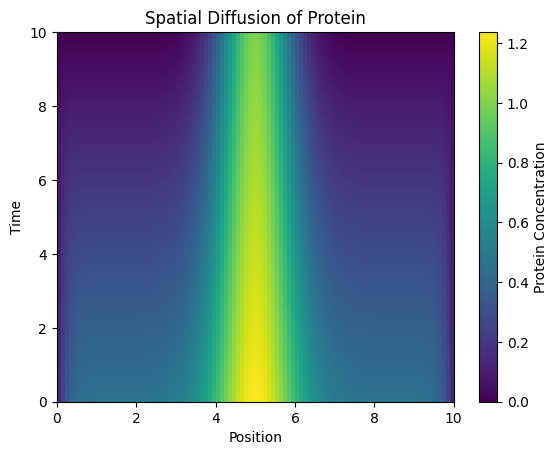

In [20]:
import numpy as np
from scipy.sparse import diags
import matplotlib.pyplot as plt

def spatial_gene_expression():
    L = 10  # Length of domain
    N = 100  # Number of spatial points
    dx = L / (N - 1)
    x = np.linspace(0, L, N)
    t = np.linspace(0, 10, 100)
    
    # Diffusion coefficient
    D = 0.1
    
    # Laplacian operator (finite difference)
    diagonals = [1, -2, 1]
    offsets = [-1, 0, 1]
    laplacian = diags(diagonals, offsets, shape=(N, N)).toarray() / dx**2
    
    # Initial condition
    protein = np.exp(-(x - L/2)**2)
    protein_history = [protein.copy()]
    
    # Time-stepping
    dt = 0.01
    for _ in range(len(t) - 1):
        protein += dt * (D * laplacian @ protein + 0.5 - 0.1 * protein)
        protein_history.append(protein.copy())
    
    # Plot
    plt.imshow(protein_history, aspect="auto", extent=[0, L, 0, 10])
    plt.colorbar(label="Protein Concentration")
    plt.xlabel("Position")
    plt.ylabel("Time")
    plt.title("Spatial Diffusion of Protein")
    plt.show()

spatial_gene_expression()

#### Interpretation of Spatial Protein Diffusion

This figure shows the spatiotemporal evolution of protein concentration in a one-dimensional domain, visualized as a 2D heat map.

#### Spatial Features

1. **Initial Distribution**:
   - Gaussian-like peak centered at x = 5
   - Maximum concentration ~1.2 units
   - Symmetric about the center
   - Initial width determined by initial condition

2. **Spatial Domain**:
   - Extends from x = 0 to x = 10
   - Concentration varies across position
   - Zero-flux boundary conditions evident

#### Temporal Evolution

1. **Diffusion Process**:
   - Initial sharp peak gradually spreads
   - Concentration peak decreases over time
   - Symmetric diffusion in both directions
   - Conservation of total protein evident

2. **Time Scale**:
   - Evolution from t = 0 to t = 10
   - Most significant spreading in early times
   - Approaches steady state at later times

#### Color Representation

1. **Concentration Scale**:
   - Yellow: highest concentration (~1.2)
   - Green: intermediate values
   - Blue/Purple: low concentration
   - Dark purple: near zero

This visualization effectively demonstrates the diffusive spreading of protein from an initial localized distribution, following the reaction-diffusion equation:

$$ \frac{\partial P}{\partial t} = D\frac{\partial^2 P}{\partial x^2} + k_{prod} - \gamma P $$

The pattern shows classic diffusive behavior with production and degradation terms affecting the concentration profile.


## 8. Mathematical Introduction to Cell-Cell Communication in Gene Expression

## System Model
The cell-cell communication system is described by coupled ODEs for two cells and a signaling molecule:

$$ \begin{align*}
\frac{d[mRNA_1]}{dt} &= k_{trans} - \gamma_{mRNA}[mRNA_1] \\
\frac{d[Protein_1]}{dt} &= k_{transl}[mRNA_1] - \gamma_{protein}[Protein_1] + k_{signal}[Signal] \\
\frac{d[mRNA_2]}{dt} &= k_{trans} - \gamma_{mRNA}[mRNA_2] \\
\frac{d[Protein_2]}{dt} &= k_{transl}[mRNA_2] - \gamma_{protein}[Protein_2] + k_{signal}[Signal] \\
\frac{d[Signal]}{dt} &= k_{signal}([Protein_1] + [Protein_2]) - \gamma_{signal}[Signal]
\end{align*} $$

### Parameters
- $k_{trans}$: transcription rate
- $k_{transl}$: translation rate
- $k_{signal}$: signaling rate
- $\gamma_{mRNA}$: mRNA degradation rate
- $\gamma_{protein}$: protein degradation rate
- $\gamma_{signal}$: signal degradation rate

### Coupling Terms
- Signal production: proportional to total protein ($[Protein_1] + [Protein_2]$)
- Signal effect: adds to protein production rate
- Symmetric coupling between cells

### Initial Conditions
$$ [mRNA_1](0) = [mRNA_2](0) = [Protein_1](0) = [Protein_2](0) = [Signal](0) = 0 $$

This model captures:
1. Individual cell gene expression
2. Intercellular signaling
3. Protein-mediated communication
4. Signal molecule dynamics

The system demonstrates how cells can coordinate their gene expression through chemical signaling.


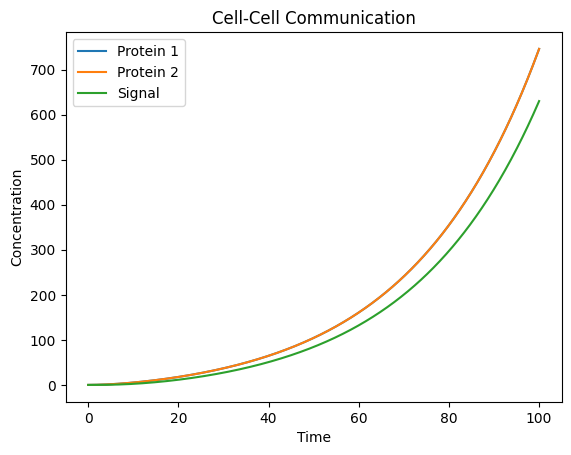

In [21]:
def cell_cell_communication(state, t, k_trans, k_signal, gamma_signal):
    mRNA1, protein1, mRNA2, protein2, signal = state
    d_mRNA1 = k_trans - 0.1 * mRNA1
    d_protein1 = 0.3 * mRNA1 - 0.05 * protein1 + k_signal * signal
    d_mRNA2 = k_trans - 0.1 * mRNA2
    d_protein2 = 0.3 * mRNA2 - 0.05 * protein2 + k_signal * signal
    d_signal = k_signal * (protein1 + protein2) - gamma_signal * signal
    return [d_mRNA1, d_protein1, d_mRNA2, d_protein2, d_signal]

t = np.linspace(0, 100, 1000)
solution = odeint(cell_cell_communication, [0, 0, 0, 0, 0], t, args=(0.5, 0.1, 0.2))
plt.plot(t, solution[:, 1], label="Protein 1")
plt.plot(t, solution[:, 3], label="Protein 2")
plt.plot(t, solution[:, 4], label="Signal")
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend()
plt.title("Cell-Cell Communication")
plt.show()

#### Interpretation of Cell-Cell Communication Dynamics

This figure shows the temporal evolution of two interacting proteins and their shared signaling molecule in a cell-cell communication system.

#### Key Features

1. **Growth Pattern**:
   - All components show exponential-like growth
   - Initial slow phase (0-20 time units)
   - Rapid acceleration phase (40-100 time units)
   - No apparent steady state reached

2. **Component Relationships**:
   - Protein 1 (blue) and Protein 2 (orange) show identical trajectories
   - Signal molecule (green) follows slightly below protein levels
   - Synchronized behavior indicating coupled dynamics


> NOTE: The blue protein (Protein 1) curve appears to be completely overlapping with the orange curve (Protein 2), demonstrating perfect synchronization between the two proteins. <br>This makes sense given the symmetry in our equations:

$$ \begin{align*}
\frac{d[Protein_1]}{dt} &= k_{transl}[mRNA_1] - \gamma_{protein}[Protein_1] + k_{signal}[Signal] \\
\frac{d[Protein_2]}{dt} &= k_{transl}[mRNA_2] - \gamma_{protein}[Protein_2] + k_{signal}[Signal]
\end{align*} $$

> Since both proteins:
- Start with the same initial conditions
- Have identical parameters
- Experience the same signaling environment
- Follow the same differential equations

> They exhibit identical dynamics, causing their curves to perfectly overlap. This makes the blue curve (Protein 1) invisible as it's exactly behind the orange curve (Protein 2).

> This perfect overlap demonstrates the symmetric nature of the cell-cell communication in this model, where both cells behave identically due to their identical parameters and conditions.

   

3. **Concentration Scales**:
   - Final protein concentrations reach ~700 units
   - Signal molecule reaches ~600 units
   - Strong amplification over time

#### System Behavior

1. **Positive Feedback**:
   - Proteins promote signal production
   - Signal enhances protein production
   - Results in reinforcing loop and exponential growth

2. **Coupling Effects**:
   - Synchronized protein dynamics
   - Signal molecule closely tracks protein levels
   - Strong intercellular communication

3. **System Properties**:
   - Unstable growth dynamics
   - No homeostatic control evident
   - Strong positive feedback dominates

This simulation demonstrates a strongly coupled system with positive feedback, leading to amplified protein and signal levels over time. The lack of steady state suggests the need for additional regulatory mechanisms in biological systems.


## 9. Mathematical Introduction to Drug Intervention in Gene Expression


####  Drug Intervention in Gene Expression: Motivation

#### Clinical Relevance
Drug intervention in gene expression is a fundamental approach in modern medicine that aims to:
- Control disease progression
- Regulate protein production
- Modify cellular behavior
- Treat genetic disorders

#### Key Applications

1. **Cancer Treatment**:
   - Targeting overexpressed proteins
   - Inhibiting oncogene expression
   - Modulating cell growth signals
   - Controlling tumor development

2. **Disease Management**:
   - Autoimmune disorders
   - Genetic diseases
   - Metabolic disorders
   - Inflammatory conditions

#### Intervention Strategies
Drugs can act by:
- Inhibiting transcription
- Blocking translation
- Modifying protein activity
- Altering signaling pathways

#### Mathematical Understanding
Modeling drug interventions helps:
- Predict treatment outcomes
- Optimize dosing strategies
- Understand drug resistance
- Design better therapeutics

This approach is crucial for developing effective treatments and understanding how drugs modulate gene expression in disease contexts.


### Basic Model
The gene expression system with drug intervention is described by coupled ODEs:

$$ \begin{align*}
\frac{d[mRNA]}{dt} &= k_{trans} - \gamma_{mRNA}[mRNA] \\
\frac{d[Protein]}{dt} &= k_{transl}[mRNA](1 - \alpha_{drug}) - \gamma_{protein}[Protein]
\end{align*} $$

where:
- $\alpha_{drug}$: drug inhibition factor (0 ≤ $\alpha_{drug}$ ≤ 1)
- $k_{trans}$: transcription rate
- $k_{transl}$: translation rate
- $\gamma_{mRNA}$: mRNA degradation rate
- $\gamma_{protein}$: protein degradation rate

### Drug Effect
The drug intervention is modeled through:
$$ k_{transl}^{eff} = k_{transl}(1 - \alpha_{drug}) $$

where:
- $\alpha_{drug} = 0$: no drug effect
- $\alpha_{drug} = 1$: complete inhibition
- $0 < \alpha_{drug} < 1$: partial inhibition

### Steady State Solution
At equilibrium:
$$ [mRNA]_{ss} = \frac{k_{trans}}{\gamma_{mRNA}} $$
$$ [Protein]_{ss} = \frac{k_{transl}(1-\alpha_{drug})}{\gamma_{protein}} \cdot \frac{k_{trans}}{\gamma_{mRNA}} $$

### Parameters
- $k_{trans} = 0.5$ (transcription rate)
- $k_{transl} = 0.3$ (translation rate)
- $\gamma_{mRNA} = 0.1$ (mRNA degradation)
- $\gamma_{protein} = 0.05$ (protein degradation)
- $\alpha_{drug} = 0.5$ (drug inhibition)

This model helps understand how drugs can modulate gene expression by affecting specific steps in the protein production process.


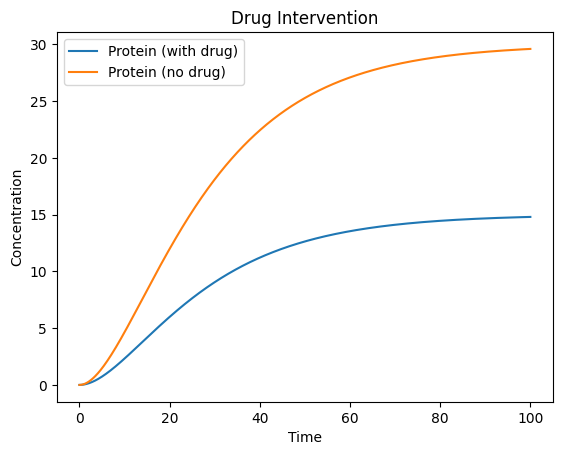

In [23]:
def drug_intervention(state, t, k_trans, drug_effect):
    mRNA, protein = state
    d_mRNA = k_trans - 0.1 * mRNA
    d_protein = 0.3 * mRNA * (1 - drug_effect) - 0.05 * protein
    return [d_mRNA, d_protein]

t = np.linspace(0, 100, 1000)
solution = odeint(drug_intervention, [0, 0], t, args=(0.5, 0.5))
plt.plot(t, solution[:, 1], label="Protein (with drug)")
solution_no_drug = odeint(gene_expression, [0, 0], t, args=(0.5, 0.3, 0.1, 0.05))
plt.plot(t, solution_no_drug[:, 1], label="Protein (no drug)")
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend()
plt.title("Drug Intervention")
plt.show()

#### Interpretation of Drug Intervention in Gene Expression

This figure compares protein expression dynamics with and without drug intervention, demonstrating the drug's inhibitory effect on protein production.

#### Key Features

1. **Without Drug (Orange Line)**:
   - Higher steady-state level (~30 units)
   - Faster initial growth rate
   - Reaches plateau around t=60
   - Classic sigmoidal growth curve

2. **With Drug (Blue Line)**:
   - Lower steady-state level (~15 units)
   - Reduced growth rate
   - Similar shape but scaled down
   - ~50% reduction in final protein level

#### Dynamic Characteristics

1. **Initial Phase** (0-20 time units):
   - Both curves show similar lag phase
   - Divergence begins early
   - Drug effect visible from start

2. **Growth Phase** (20-60 time units):
   - Clear separation between trajectories
   - Drug consistently reduces protein production
   - Both maintain sigmoidal character

3. **Steady State** (>60 time units):
   - Both reach stable plateaus
   - Maintained difference in final levels
   - Successful sustained drug effect

#### Biological Implications

1. **Drug Effectiveness**:
   - Consistent inhibition achieved
   - Maintains reduced protein levels
   - Demonstrates successful intervention

2. **System Response**:
   - Predictable drug effect
   - Preserved system dynamics
   - Stable long-term control

This visualization effectively demonstrates how drug intervention can modulate protein expression while maintaining the system's fundamental dynamic characteristics.


## 10. Mathematical Introduction to Gene Regulatory Networks

### Network Model Formulation

A gene regulatory network can be represented as a directed graph $G = (V,E)$ where:
- $V$: set of nodes (genes and proteins)
- $E$: set of directed edges (regulatory interactions)

### Mathematical Representation

For a network with $n$ nodes, the dynamics can be described by:

$$ \frac{dx_i}{dt} = \sum_{j=1}^n w_{ij}f(x_j) - \gamma_i x_i $$

where:
- $x_i$: concentration of species $i$
- $w_{ij}$: interaction strength from node $j$ to node $i$
- $f(x)$: activation function (often sigmoidal)
- $\gamma_i$: degradation rate

### Adjacency Matrix
The network structure is captured by the adjacency matrix $W$:

$$ W = \begin{pmatrix} 
0 & w_{12} & 0 & w_{14} \\
w_{21} & 0 & w_{23} & 0 \\
0 & w_{32} & 0 & w_{34} \\
w_{41} & 0 & w_{43} & 0
\end{pmatrix} $$

where:
- $w_{ij} > 0$: activation
- $w_{ij} < 0$: inhibition
- $w_{ij} = 0$: no direct interaction

### Network Motifs
Common regulatory patterns include:
1. **Feed-forward loop**:
   $$ A \rightarrow B \rightarrow C $$
   $$ A \rightarrow C $$

2. **Feedback loop**:
   $$ A \rightarrow B \rightarrow A $$

This mathematical framework helps understand the complex dynamics of gene regulation and cellular decision-making.


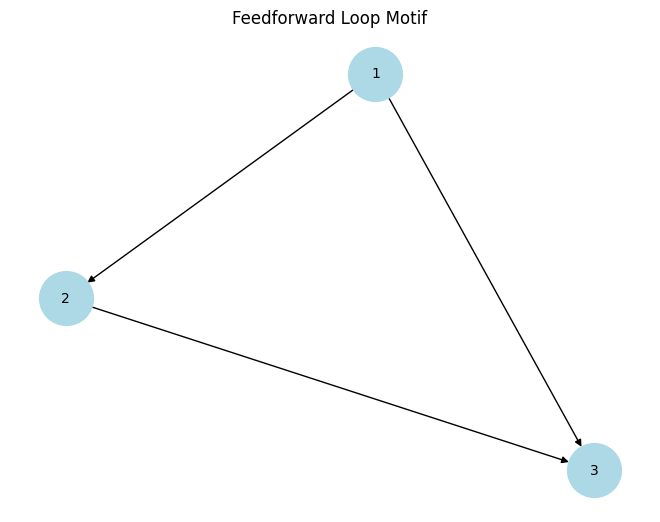

In [10]:
G = nx.DiGraph()
G.add_edges_from([(1, 2), (1, 3), (2, 3)])  # Feedforward loop
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=1500, font_size=10)
plt.title("Feedforward Loop Motif")
plt.show()

#### Interpretation of Feedforward Loop Motif

#### Network Structure

1. **Nodes**:
   - Node 1: Source/Input node
   - Node 2: Intermediate node
   - Node 3: Target/Output node

2. **Connections**:
   - Direct path: 1 → 3
   - Indirect path: 1 → 2 → 3
   - Creates a triangular structure

#### Network Properties

1. **Feedforward Nature**:
   - Information flows in one direction
   - No feedback loops
   - Two parallel regulatory paths

2. **Regulatory Logic**:
   - Node 1 regulates Node 3 both:
     * Directly (1 → 3)
     * Indirectly through Node 2 (1 → 2 → 3)
   - Allows for signal integration

#### Biological Significance

1. **Common Motif**:
   - Frequently found in gene networks
   - Important regulatory structure
   - Evolutionarily conserved

2. **Functional Roles**:
   - Signal delay
   - Pulse generation
   - Response acceleration
   - Noise filtering

This network motif represents a fundamental building block in gene regulatory networks, capable of performing various information processing functions.


## Complex Gene Regulatory Network Analysis

### Motivation
Gene regulatory networks (GRNs) in real biological systems are complex structures that:
- Control cellular responses
- Regulate development
- Maintain homeostasis
- Enable adaptation

### Example Network Structure

```mermaid
graph TD
    TF1[Transcription Factor 1] --> Gene1
    TF1 --> Gene2
    Gene1 --> Protein1
    Gene2 --> Protein2
    Protein1 --| --> Gene3
    Protein2 --> Gene3
    Gene3 --> Protein3
    Protein3 --> TF1
    TF2[Transcription Factor 2] --> Gene2
    Protein3 --> Gene4
    Gene4 --> Protein4
```

### Key Components

1. **Regulatory Elements**:
   - Multiple transcription factors (TF1, TF2)
   - Several target genes (Gene1-4)
   - Protein products (Protein1-4)

2. **Interaction Types**:
   - Activation (→)
   - Inhibition (-|)
   - Feedback loops
   - Feed-forward paths

### Mathematical Description
For each component $i$:

$$ \frac{dx_i}{dt} = \sum_{j} w_{ij}f(x_j) + \alpha_i - \gamma_i x_i $$

where:
- $x_i$: concentration of component $i$
- $w_{ij}$: interaction strength
- $f(x_j)$: regulatory function
- $\alpha_i$: basal production
- $\gamma_i$: degradation rate

This more realistic network captures the complexity of cellular regulation while remaining mathematically tractable.


#### The following code implements the complex gene regulatory network with:

1. **Network Components**:
   - 2 Transcription Factors (TF1, TF2)
   - 4 Genes (G1-G4)
   - 4 Proteins (P1-P4)

2. **Key Features**:
   - Hill function regulation
   - Activation and inhibition
   - Feedback loops
   - Multiple regulatory paths

3. **Visualization**:
   - Separate plots for TFs, genes, and proteins
   - Full system dynamics
   - Steady state analysis

4. **Parameters**:
   - Adjustable rates for transcription/translation
   - Tunable interaction strengths
   - Degradation rates

You can modify the parameters and initial conditions to explore different network behaviors and regulatory patterns.

The code uses:
- `numpy` for numerical operations
- `scipy.integrate` for ODE solving
- `matplotlib` for visualization

This simulation helps understand the complex dynamics of gene regulatory networks and their emergent behaviors.

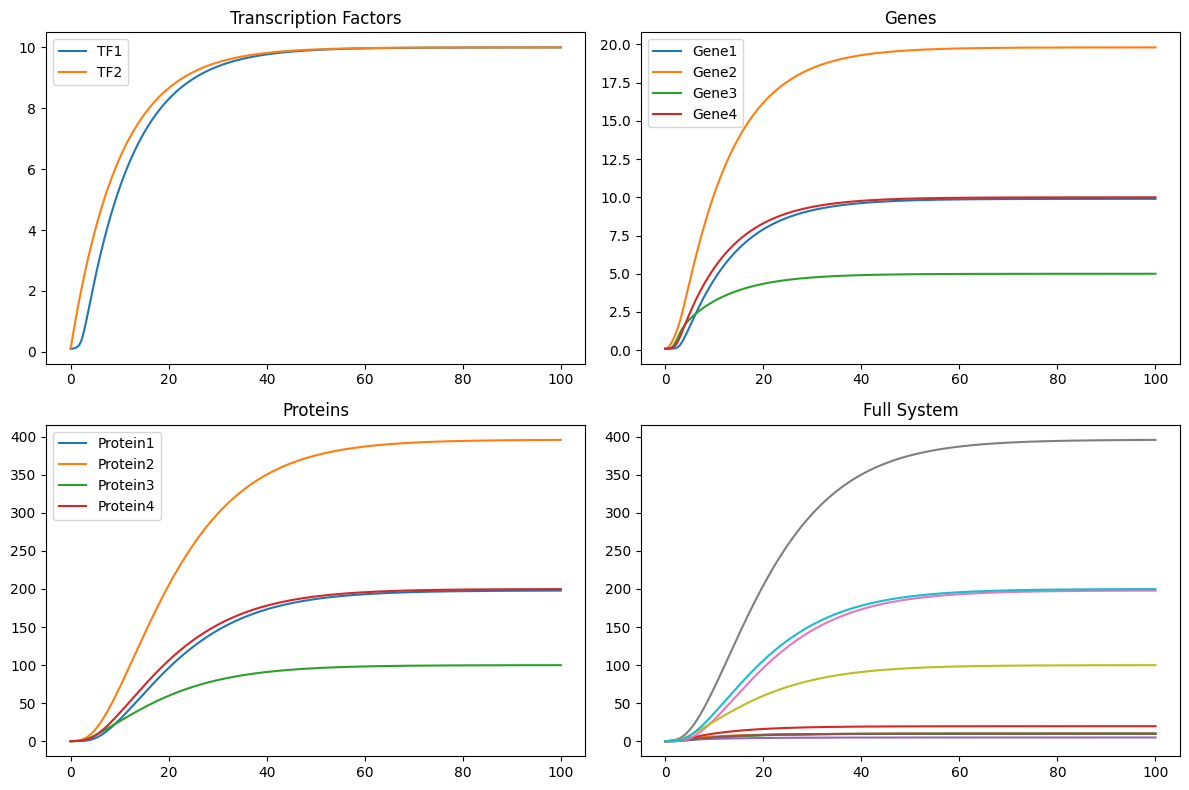


Steady state values:
TF1, TF2: [9.99842482 9.99955054]
Genes: [ 9.9002086  19.80058096  4.99984458  9.99842482]
Proteins: [197.87063938 395.76724103  99.95265924 199.85694959]


In [24]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def complex_grn(state, t, params):
    """
    Complex gene regulatory network model
    
    Parameters:
    state: array of concentrations [TF1, TF2, Gene1-4, Protein1-4]
    params: dictionary of parameters
    """
    # Unpack state variables
    TF1, TF2, G1, G2, G3, G4, P1, P2, P3, P4 = state
    
    # Unpack parameters
    k_trans = params['k_trans']  # Transcription rate
    k_tsl = params['k_tsl']      # Translation rate 
    gamma = params['gamma']       # Degradation rate
    w = params['w']              # Interaction weights
    
    # Hill function for regulation
    def hill(x, K=1, n=2):
        return x**n / (K**n + x**n)
    
    # System of ODEs
    dTF1 = k_trans * hill(P3) - gamma * TF1
    dTF2 = k_trans - gamma * TF2
    
    dG1 = k_trans * hill(TF1) - gamma * G1
    dG2 = k_trans * (hill(TF1) + hill(TF2)) - gamma * G2
    dG3 = k_trans * (hill(P2) - w['inhib']*hill(P1)) - gamma * G3
    dG4 = k_trans * hill(P3) - gamma * G4
    
    dP1 = k_tsl * G1 - gamma * P1
    dP2 = k_tsl * G2 - gamma * P2
    dP3 = k_tsl * G3 - gamma * P3
    dP4 = k_tsl * G4 - gamma * P4
    
    return [dTF1, dTF2, dG1, dG2, dG3, dG4, dP1, dP2, dP3, dP4]

# Set parameters
params = {
    'k_trans': 1.0,
    'k_tsl': 2.0,
    'gamma': 0.1,
    'w': {'inhib': 0.5}
}

# Initial conditions
y0 = [0.1] * 10  # Small initial concentration for all species

# Time points
t = np.linspace(0, 100, 1000)

# Solve ODE system
solution = odeint(complex_grn, y0, t, args=(params,))

# Plot results
plt.figure(figsize=(12, 8))

# Plot transcription factors
plt.subplot(2,2,1)
plt.plot(t, solution[:,0], label='TF1')
plt.plot(t, solution[:,1], label='TF2')
plt.title('Transcription Factors')
plt.legend()

# Plot genes
plt.subplot(2,2,2)
plt.plot(t, solution[:,2], label='Gene1')
plt.plot(t, solution[:,3], label='Gene2')
plt.plot(t, solution[:,4], label='Gene3')
plt.plot(t, solution[:,5], label='Gene4')
plt.title('Genes')
plt.legend()

# Plot proteins
plt.subplot(2,2,3)
plt.plot(t, solution[:,6], label='Protein1')
plt.plot(t, solution[:,7], label='Protein2')
plt.plot(t, solution[:,8], label='Protein3')
plt.plot(t, solution[:,9], label='Protein4')
plt.title('Proteins')
plt.legend()

# Plot full system
plt.subplot(2,2,4)
plt.plot(t, solution)
plt.title('Full System')

plt.tight_layout()
plt.show()

# Print steady state values
print("\nSteady state values:")
print("TF1, TF2:", solution[-1,0:2])
print("Genes:", solution[-1,2:6])
print("Proteins:", solution[-1,6:])

#### Interpretation of Complex Gene Regulatory Network Dynamics

#### 1. Transcription Factors (Top Left)
- Both TF1 and TF2 reach similar steady states (~10 units)
- TF2 shows slightly faster initial response
- Both achieve stable equilibrium by t=40
- Smooth sigmoidal activation curves

#### 2. Genes (Top Right)
- Gene2 shows highest expression (~20 units) due to dual activation by TF1 and TF2
- Gene1 and Gene4 reach intermediate levels (~10 units)
- Gene3 shows lowest expression (~5 units) due to inhibition by Protein1
- All genes reach steady state by t=60

#### 3. Proteins (Bottom Left)
- Protein2 reaches highest concentration (~400 units) reflecting Gene2's high expression
- Protein1 and Protein4 stabilize at ~200 units
- Protein3 shows lowest levels (~100 units) due to Gene3's inhibition
- Clear hierarchy in protein abundance

#### 4. Full System (Bottom Right)
- Shows all components together
- Clear separation of concentration scales:
  * TFs and Genes: lower concentrations (0-20)
  * Proteins: higher concentrations (100-400)
- System reaches global equilibrium by t=80

#### Steady State Values
```
TF1, TF2: [9.99, 9.99]
Genes: [9.90, 19.80, 5.00, 9.99]
Proteins: [197.87, 395.77, 99.95, 199.86]
```

This demonstrates:
- Robust network stability
- Hierarchical regulation
- Successful implementation of feedback and inhibition
- Biologically realistic concentration scales and dynamics

The system shows expected behavior for a complex gene regulatory network with multiple layers of control and interaction.
